In [1]:
import os
os.getcwd()

'/Users/Abhimika/Desktop/AI and Data Science/Machine Learning'

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

In [4]:
df_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [5]:
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_test.shape

(4209, 377)

In [7]:
df_train.shape

(4209, 378)

In [8]:
columns = df_train.columns

In [9]:
# Selecting columns with datatypes as int64
a = []
for i in columns: 
    if df_train[i].dtypes == np.int64:
        a.append(i)
df_train_var = df_train[a]        

In [10]:
df_train_var.head(5)

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,6,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Getting list of column with 0 variance 
drop_col = []
for var in df_train_var: 
    if df_train_var[var].var() == 0:
        drop_col.append(var)
drop_col

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [12]:
# Droping columns from Train datasets 
df_train = df_train.drop(drop_col, axis = 1)

In [13]:
# Droping columns from Test datasets 
df_test = df_test.drop(drop_col, axis = 1)

In [14]:
df_test.head(5)

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [15]:
# Dropping ID Column 
df_train = df_train.drop(['ID'], axis = 1)
df_test = df_test.drop(['ID'], axis = 1)

In [16]:
df_test.isnull().any()

X0      False
X1      False
X2      False
X3      False
X4      False
        ...  
X380    False
X382    False
X383    False
X384    False
X385    False
Length: 364, dtype: bool

In [17]:
# Creating a dictionary and passing unique count of each column in train and passing null column in a list 
col = df_train.columns
uniq_col_train = {}
null_col = []
val = 0 
for i in col : 
    val = len(df_train[i].unique())
    uniq_col_train[i] = val
    if df_train[i].isnull().any():
        null_col.append(i)
uniq_col_train  

{'y': 2545,
 'X0': 47,
 'X1': 27,
 'X2': 44,
 'X3': 7,
 'X4': 4,
 'X5': 29,
 'X6': 12,
 'X8': 25,
 'X10': 2,
 'X12': 2,
 'X13': 2,
 'X14': 2,
 'X15': 2,
 'X16': 2,
 'X17': 2,
 'X18': 2,
 'X19': 2,
 'X20': 2,
 'X21': 2,
 'X22': 2,
 'X23': 2,
 'X24': 2,
 'X26': 2,
 'X27': 2,
 'X28': 2,
 'X29': 2,
 'X30': 2,
 'X31': 2,
 'X32': 2,
 'X33': 2,
 'X34': 2,
 'X35': 2,
 'X36': 2,
 'X37': 2,
 'X38': 2,
 'X39': 2,
 'X40': 2,
 'X41': 2,
 'X42': 2,
 'X43': 2,
 'X44': 2,
 'X45': 2,
 'X46': 2,
 'X47': 2,
 'X48': 2,
 'X49': 2,
 'X50': 2,
 'X51': 2,
 'X52': 2,
 'X53': 2,
 'X54': 2,
 'X55': 2,
 'X56': 2,
 'X57': 2,
 'X58': 2,
 'X59': 2,
 'X60': 2,
 'X61': 2,
 'X62': 2,
 'X63': 2,
 'X64': 2,
 'X65': 2,
 'X66': 2,
 'X67': 2,
 'X68': 2,
 'X69': 2,
 'X70': 2,
 'X71': 2,
 'X73': 2,
 'X74': 2,
 'X75': 2,
 'X76': 2,
 'X77': 2,
 'X78': 2,
 'X79': 2,
 'X80': 2,
 'X81': 2,
 'X82': 2,
 'X83': 2,
 'X84': 2,
 'X85': 2,
 'X86': 2,
 'X87': 2,
 'X88': 2,
 'X89': 2,
 'X90': 2,
 'X91': 2,
 'X92': 2,
 'X94': 2,
 'X95': 2,


In [18]:
# It seems there is no columns with null value 
null_col

[]

In [19]:
# Creating a dictionary and passing unique count of each column in test 
col_test = df_test.columns
uniq_col_test = {}
null_col_test = []
val_test = 0 
for i in col_test : 
    val_test = len(df_test[i].unique())
    uniq_col_test[i] = val_test
    if df_test[i].isnull().any():
        null_col_test.append(i)
uniq_col_test  

{'X0': 49,
 'X1': 27,
 'X2': 45,
 'X3': 7,
 'X4': 4,
 'X5': 32,
 'X6': 12,
 'X8': 25,
 'X10': 2,
 'X12': 2,
 'X13': 2,
 'X14': 2,
 'X15': 2,
 'X16': 2,
 'X17': 2,
 'X18': 2,
 'X19': 2,
 'X20': 2,
 'X21': 2,
 'X22': 2,
 'X23': 2,
 'X24': 2,
 'X26': 2,
 'X27': 2,
 'X28': 2,
 'X29': 2,
 'X30': 2,
 'X31': 2,
 'X32': 2,
 'X33': 2,
 'X34': 2,
 'X35': 2,
 'X36': 2,
 'X37': 2,
 'X38': 2,
 'X39': 2,
 'X40': 2,
 'X41': 2,
 'X42': 2,
 'X43': 2,
 'X44': 2,
 'X45': 2,
 'X46': 2,
 'X47': 2,
 'X48': 2,
 'X49': 2,
 'X50': 2,
 'X51': 2,
 'X52': 2,
 'X53': 2,
 'X54': 2,
 'X55': 2,
 'X56': 2,
 'X57': 2,
 'X58': 2,
 'X59': 2,
 'X60': 2,
 'X61': 2,
 'X62': 2,
 'X63': 2,
 'X64': 2,
 'X65': 2,
 'X66': 2,
 'X67': 2,
 'X68': 2,
 'X69': 2,
 'X70': 2,
 'X71': 2,
 'X73': 2,
 'X74': 2,
 'X75': 2,
 'X76': 2,
 'X77': 2,
 'X78': 2,
 'X79': 2,
 'X80': 2,
 'X81': 2,
 'X82': 2,
 'X83': 2,
 'X84': 2,
 'X85': 2,
 'X86': 2,
 'X87': 2,
 'X88': 2,
 'X89': 2,
 'X90': 2,
 'X91': 2,
 'X92': 2,
 'X94': 2,
 'X95': 2,
 'X96': 2,
 

In [20]:
# It seems there is no columns with null value in test 
null_col_test

[]

In [21]:
categ_col =df_train.dtypes.loc[df_train.dtypes == 'object'].index
categ_col

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

In [22]:
# Apply label encoder.
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [23]:
for cols in categ_col:
    df_train[cols] = lb.fit_transform(df_train[cols])
    df_test[cols] = lb.fit_transform(df_test[cols])

In [24]:
X_train = df_train.iloc[:,1:]
X_test = df_test

In [27]:
# Perform dimensionality reduction.

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components = 12)

In [29]:
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.fit_transform(X_test)

In [30]:
explained_variance = pca.explained_variance_ratio_

In [31]:
explained_variance

array([0.4351543 , 0.17671029, 0.13646395, 0.10977994, 0.08622272,
       0.01433973, 0.00722971, 0.00406846, 0.00274009, 0.00228114,
       0.00221527, 0.00182722])

In [32]:
y_train = df_train.iloc[:,0]

In [33]:
y_train.shape

(4209,)

In [35]:
import xgboost as xgb

/Users/Abhimika/anaconda3/lib/python3.7/site-packages/dask/dataframe/utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [36]:
# Predict your test_df values using XGBoost.

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [46]:
x_trains, x_valid, Y_trains, y_valid = train_test_split(X_pca_train, y_train, test_size = 0.2)

In [47]:
args = {'objective':'reg:linear','eta': 0.02, 'max_depth':5}
dm_train = xgb.DMatrix(x_trains, label=Y_trains)
dm_valid = xgb.DMatrix(x_valid, label=y_valid)
dm_test = xgb.DMatrix(X_pca_test)

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

watchlist = [(dm_train, 'train'), (dm_valid, 'valid')]

clf = xgb.train(args, dm_train, 
                1000, watchlist, early_stopping_rounds=50, 
                feval=xgb_r2_score, maximize=True, verbose_eval=10)

[22:37:51] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:98.89958	valid-rmse:99.27986	train-r2:-62.02965	valid-r2:-52.90216
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 50 rounds.
[10]	train-rmse:81.04183	valid-rmse:81.50005	train-r2:-41.32280	valid-r2:-35.32450
[20]	train-rmse:66.48271	valid-rmse:67.01619	train-r2:-27.48219	valid-r2:-23.56084
[30]	train-rmse:54.62336	valid-rmse:55.23515	train-r2:-18.22706	valid-r2:-15.68457
[40]	train-rmse:44.97927	valid-rmse:45.70255	train-r2:-12.03709	valid-r2:-10.42259
[50]	train-rmse:37.15473	valid-rmse:37.99981	train-r2:-7.89578	valid-r2:-6.89672
[60]	train-rmse:30.82551	valid-rmse:31.82158	train-r2:-5.12318	valid-r2:-4.53767
[70]	train-rmse:25.72687	valid-rmse:26.87674	train-r2:-3.26511	valid-r2:-2.95036
[80]	train-rmse:21.64101	valid-rmse:22.96774	train-r2

In [64]:
p_test = clf.predict(dm_test)
p_test

array([ 76.699745,  98.43021 ,  81.37024 , ..., 104.10831 , 113.08915 ,
        98.12314 ], dtype=float32)

In [70]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

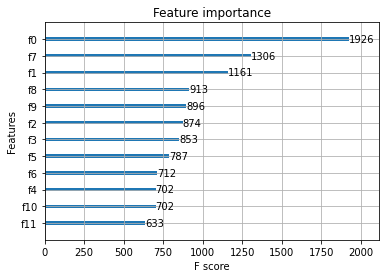

In [68]:
xgb.plot_importance(clf)

In [ ]:
####################